### Part 3: Running the Machine Learning Models 

In [1]:
import pandas as pd
df_model = pd.read_csv("final_cleaned_data_ML.csv")
df_model.head()

,goal,staff_pick,slug_length,state_bool,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,5000.0,1,33,1,30.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24042.0,1,34,1,27.0,20.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4000.0,0,8,0,60.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,500.0,0,29,1,19.0,8.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2500.0,0,26,1,30.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [2]:
df_model.columns

Index(['goal', 'staff_pick', 'slug_length', 'state_bool', 'campaign_days',
       'creation_to_launch_days', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'category_art',
       'category_comics', 'category_crafts', 'category_dance',
       'category_design', 'category_fashion', 'category_film & video',
       'category_food', 'category_games', 'category_journalism',
       'category_music', 'category_photography', 'category_publishing',
       'category_technology', 'category_theater', 'blurb_length',
       'name_length', 'launch_month_1', 'launch_month_2', 'launch_month_3',
       'launch_month_4', 'launch_month_5', 'launch_month_6', 'launch_month_7',
       'launch_month_8', 'launch_month_9', 'lau

In [3]:
X_temp = df_model.drop(['state_bool'], axis=1)
y = df_model.state_bool

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 169962
Length of y is 169962


In [4]:
X_temp.head()

,goal,staff_pick,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,5000.0,1,33,30.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24042.0,1,34,27.0,20.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4000.0,0,8,60.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,500.0,0,29,19.0,8.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2500.0,0,26,30.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))
X.head()

,goal,staff_pick,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,-0.037708,2.601522,0.056000,-0.226036,-0.293315,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.299399,-0.268903,-0.247857,-0.326247,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
1,-0.021615,2.601522,0.129005,-0.479827,-0.209304,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.299399,-0.268903,-0.247857,3.065164,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137
2,-0.038553,-0.384390,-1.769120,2.311867,-0.354413,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.299399,-0.268903,-0.247857,-0.326247,-0.315483,3.141974,-0.321401,-0.299177,-0.293669,-0.288137
3,-0.041511,-0.384390,-0.236019,-1.156601,-0.300952,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.299399,-0.268903,-0.247857,-0.326247,-0.315483,3.141974,-0.321401,-0.299177,-0.293669,-0.288137
4,-0.039821,-0.384390,-0.455033,-0.226036,-0.362051,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.299399,-0.268903,-0.247857,3.065164,-0.315483,-0.318271,-0.321401,-0.299177,-0.293669,-0.288137


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 118973
Length of test set is 50989
Shape of X_train is (118973, 75)
Shape of y_train is (118973,)
Shape of X_test is (50989, 75)
Shape of y_test is (50989,)


In [12]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = logisticRegr.predict(X_test)

In [9]:
from sklearn import metrics
print("Results for logistic regression without sentiments")
metrics.accuracy_score(y_test, y_pred)

Results for logistic regression without sentiments


0.7072309713859852

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62     21785
           1       0.72      0.81      0.76     29204

    accuracy                           0.71     50989
   macro avg       0.70      0.69      0.69     50989
weighted avg       0.71      0.71      0.70     50989



In [11]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

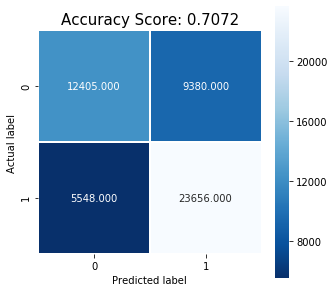

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [7]:
############ SVM #################
from sklearn.svm import SVC
clf = SVC(gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60     21785
           1       0.70      0.82      0.75     29204

    accuracy                           0.69     50989
   macro avg       0.69      0.67      0.68     50989
weighted avg       0.69      0.69      0.69     50989



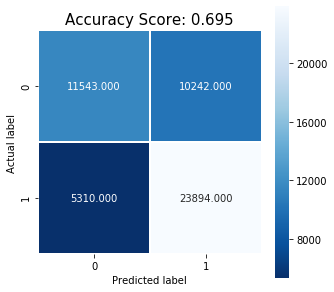

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [13]:
####### Decision trees ##############
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Results for Decision tree without sentiments")
metrics.accuracy_score(y_test, y_pred)

Results for Decision tree without sentiments


0.6551413049873502

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60     21785
           1       0.70      0.69      0.70     29204

    accuracy                           0.66     50989
   macro avg       0.65      0.65      0.65     50989
weighted avg       0.66      0.66      0.66     50989



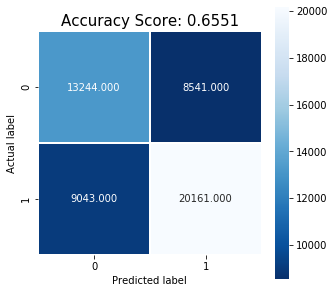

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [17]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68     21785
           1       0.75      0.82      0.78     29204

    accuracy                           0.74     50989
   macro avg       0.74      0.73      0.73     50989
weighted avg       0.74      0.74      0.74     50989



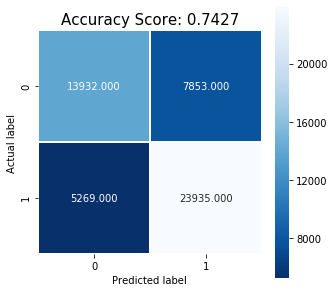

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [23]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
feature_imp

goal                        0.145977
creation_to_launch_days     0.111063
blurb_length                0.084436
name_length                 0.083122
campaign_days               0.074065
slug_length                 0.072198
staff_pick                  0.059881
category_food               0.017527
category_technology         0.014438
launch_day_0                0.012103
launch_day_2                0.011982
launch_day_1                0.011921
launch_day_3                0.011502
launch_day_4                0.011274
country_US                  0.010928
category_music              0.009529
launch_day_5                0.008303
category_film & video       0.008001
launch_day_6                0.007227
country_GB                  0.007148
category_publishing         0.006760
category_art                0.006739
launch_month_5              0.006526
deadline_month_July         0.006418
deadline_month_June         0.006350
deadline_month_May          0.006291
deadline_month_March        0.006276
l

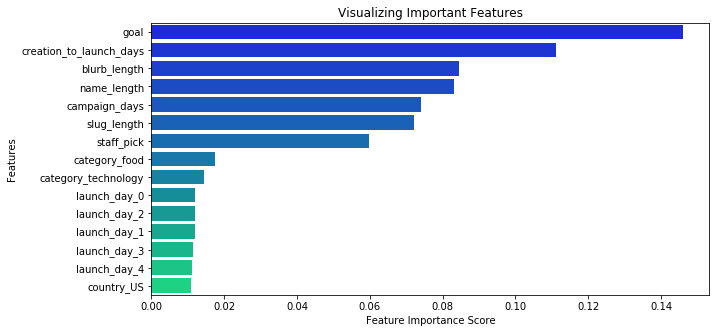

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp[0:15], y=feature_imp.index[0:15], palette='winter')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

### Models with sentiment features included

In [11]:
df_model = pd.read_csv("final_cleaned_data_ML_sentiments.csv")
df_model.head()

,Unnamed: 0,goal,staff_pick,slug_length,state_bool,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,...,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,0,5000.0,1,33,1,30.0,9.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,24042.0,1,34,1,27.0,20.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,4000.0,0,8,0,60.0,1.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3,500.0,0,29,1,19.0,8.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,4,2500.0,0,26,1,30.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
df_model.drop(['Unnamed: 0'], inplace=True, axis=1)

In [13]:
df_model.columns

Index(['goal', 'staff_pick', 'slug_length', 'state_bool', 'campaign_days',
       'creation_to_launch_days', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'category_art',
       'category_comics', 'category_crafts', 'category_dance',
       'category_design', 'category_fashion', 'category_film & video',
       'category_food', 'category_games', 'category_journalism',
       'category_music', 'category_photography', 'category_publishing',
       'category_technology', 'category_theater', 'blurb_length',
       'name_length', 'launch_month_1', 'launch_month_2', 'launch_month_3',
       'launch_month_4', 'launch_month_5', 'launch_month_6', 'launch_month_7',
       'launch_month_8', 'launch_month_9', 'lau

In [14]:
X_temp = df_model.drop(['state_bool'], axis=1)
y = df_model.state_bool

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 169962
Length of y is 169962


In [15]:
X_temp.head()

,goal,staff_pick,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,5000.0,1,33,30.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24042.0,1,34,27.0,20.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4000.0,0,8,60.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,500.0,0,29,19.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,2500.0,0,26,30.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [16]:
y.value_counts()

1    96768
0    73194
Name: state_bool, dtype: int64

In [17]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))

In [18]:
X.head()

,goal,staff_pick,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,-0.037708,2.601522,0.056000,-0.226036,-0.293315,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.321401,-0.299177,-0.293669,-0.288137,-0.757598,-0.072636,0.766202,-0.701544,-0.060947,0.707425
1,-0.021615,2.601522,0.129005,-0.479827,-0.209304,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.321401,-0.299177,-0.293669,-0.288137,-0.757598,-0.072636,0.766202,-0.701544,-0.060947,0.707425
2,-0.038553,-0.384390,-1.769120,2.311867,-0.354413,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.321401,-0.299177,-0.293669,-0.288137,1.319960,-0.072636,-1.305139,1.425427,-0.060947,-1.413577
3,-0.041511,-0.384390,-0.236019,-1.156601,-0.300952,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.321401,-0.299177,-0.293669,-0.288137,-0.757598,-0.072636,0.766202,1.425427,-0.060947,-1.413577
4,-0.039821,-0.384390,-0.455033,-0.226036,-0.362051,-0.047648,-0.153349,-0.052321,-0.21914,-0.056822,...,-0.321401,-0.299177,-0.293669,-0.288137,-0.757598,-0.072636,0.766202,-0.701544,-0.060947,0.707425


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 118973
Length of test set is 50989
Shape of X_train is (118973, 81)
Shape of y_train is (118973,)
Shape of X_test is (50989, 81)
Shape of y_test is (50989,)


In [34]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logisticRegr.predict(X_test)

In [36]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7492792563101845

In [37]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7492792563101845


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     21785
           1       0.76      0.83      0.79     29204

    accuracy                           0.75     50989
   macro avg       0.75      0.74      0.74     50989
weighted avg       0.75      0.75      0.75     50989



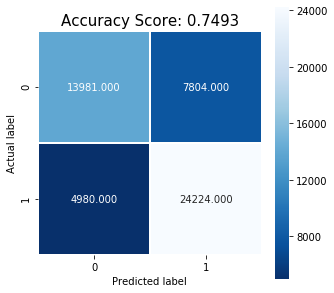

In [39]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [20]:
from sklearn.svm import SVC
clf = SVC(gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68     21785
           1       0.75      0.81      0.78     29204

    accuracy                           0.74     50989
   macro avg       0.74      0.73      0.73     50989
weighted avg       0.74      0.74      0.74     50989



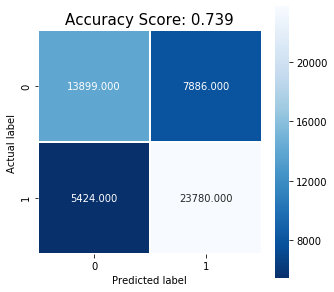

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [40]:
####### Decision trees ##############
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [41]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Results for Decision tree with sentiments")
metrics.accuracy_score(y_test, y_pred)

Results for Decision tree with sentiments


0.6822844142854341

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     21785
           1       0.73      0.71      0.72     29204

    accuracy                           0.68     50989
   macro avg       0.68      0.68      0.68     50989
weighted avg       0.68      0.68      0.68     50989



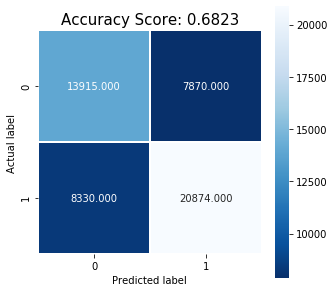

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [44]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred=clf.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     21785
           1       0.78      0.84      0.81     29204

    accuracy                           0.77     50989
   macro avg       0.77      0.76      0.76     50989
weighted avg       0.77      0.77      0.77     50989



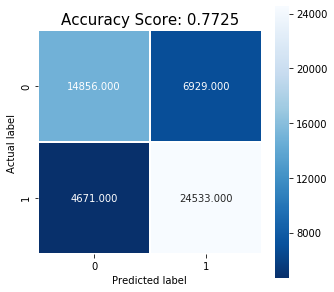

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [31]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred=clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     21785
           1       0.78      0.84      0.81     29204

    accuracy                           0.77     50989
   macro avg       0.77      0.76      0.77     50989
weighted avg       0.77      0.77      0.77     50989



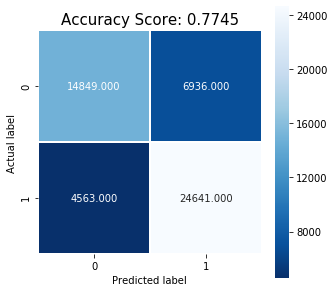

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred).round(4))
plt.title(all_sample_title, size = 15);

In [49]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
feature_imp

goal                        0.118765
creation_to_launch_days     0.091997
blurb_length                0.071460
name_length                 0.069452
campaign_days               0.061996
slug_length                 0.061589
staff_pick                  0.050148
blurb_sentiment_negative    0.049466
blurb_sentiment_positive    0.048685
name_sentiment_positive     0.027866
name_sentiment_negative     0.020979
launch_day_0                0.010687
launch_day_1                0.010648
launch_day_2                0.010574
country_US                  0.010451
launch_day_3                0.010208
category_food               0.009942
launch_day_4                0.009896
category_technology         0.008566
category_film & video       0.007711
launch_day_5                0.007324
country_GB                  0.007062
category_art                0.006975
category_music              0.006580
category_publishing         0.006499
launch_day_6                0.006269
launch_month_5              0.006028
d

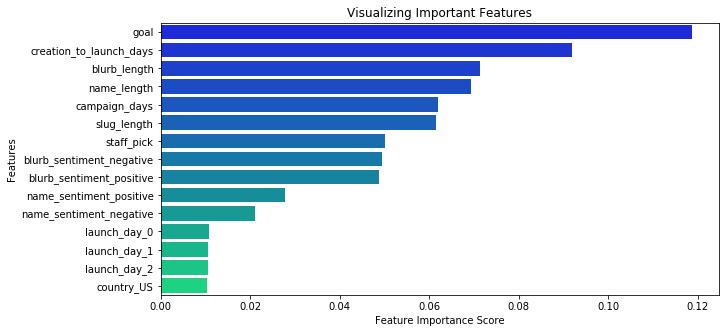

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp[0:15], y=feature_imp.index[0:15], palette='winter')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

## 